# Sample  Linear Regression Implementation

In [11]:
#import neccessary Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split

In [15]:
# Read Dataset 
df=pd.read_csv("height-weight.csv")
print("Dataset has {} rows and {} columns".format(df.shape[0],df.shape[1]))
df.head()

Dataset has 23 rows and 2 columns


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

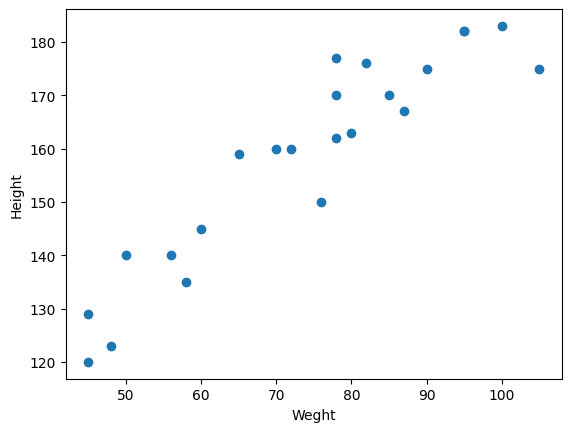

In [9]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weght")
plt.ylabel("Height")


# Above is the dataset with we have so our aim is to predict the height based on the weight of the person 
   so simply we have to find a bestfit line for the give given dataset

# Steps to follow in any Ml Project
# Deviding our Dataset into dependent and independent features 
    x=df[['Weight']] (Independent feature)
    y=df['Height'] (Dependent feature)
# Devide the Dataset to Training and Test Dataset

In [35]:
x=df[["Weight"]] # Independent feature
y=df["Height"] # Dependent feature
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) 



In [36]:
x_test.shape

(6, 1)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler=StandardScaler()

In [77]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

/opt/anaconda3/envs/ai-venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [79]:
# Now we have to train our model using Linear Regression Algorithm
from sklearn.linear_model import LinearRegression 

In [80]:
regression=LinearRegression()
regression.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
print(f"Slope Or the Coefficent is {regression.coef_}")
print("Intercept is {}".format(regression.intercept_))

Slope Or the Coefficent is [17.2982057]
Intercept is 156.47058823529412


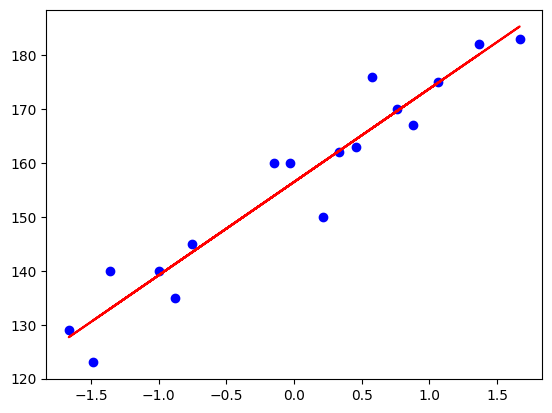

In [81]:
# Plot a scatter graph 
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train_scaled,regression.predict(x_train_scaled),color='red')

/opt/anaconda3/envs/ai-venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(array([1505.73063318, 1505.73063318,  934.88984493, 1799.80013015,
        1280.85395902, 1972.78218719]),
 15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64)

# ### Predection Of Train Data
# 1.Predected Height output=intercept + coef * Weight
# 2.y_pred_train=156.47058823529412+17.2982057* (x_train)

## Prediction Of the Test Data
# 1.Predected Height output=intercept + coef * Weight
# 2.y_pred_train=156.47058823529412+17.2982057* (x_test)


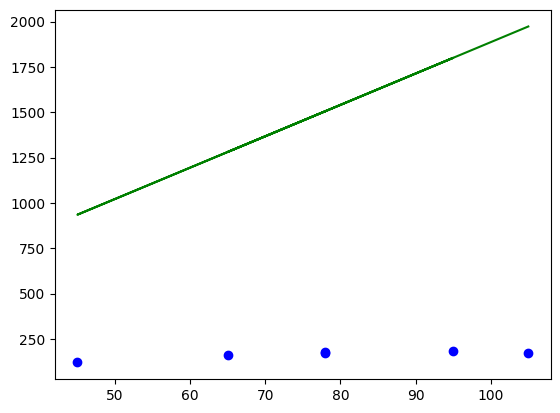

In [93]:
plt.scatter(x_test_scaled,y_test,color='blue')
plt.plot(x_test_scaled,regression.predict(x_test_scaled),color='green')

## Now we have to evaluate our model
-Like MAE, MSE, RMSE, R2 Score

In [92]:
y_pred_test=regression.predict(x_test)
y_pred_test,y_test


/opt/anaconda3/envs/ai-venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(array([1505.73063318, 1505.73063318,  934.88984493, 1799.80013015,
        1280.85395902, 1972.78218719]),
 15    177
 9     170
 0     120
 8     182
 17    159
 12    175
 Name: Height, dtype: int64)

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [87]:
mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred_test)
print("MAE is {}".format(mae))
print("MSE is {}".format(mse))
print("RMSE is {}".format(rmse))

MAE is 1336.1312312741586
MSE is 1886933.5397307759
RMSE is 1373.6569949338793


In [88]:
# ASSUMPTIONS